## Exploratory Data Analysis

### Data Preprocessing 
#### Downloading data and storing in the local machine

In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19596/1292430/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596178579&Signature=J89g1GnvIZ%2BRtPeM7LKnX1JVGym%2FLljbm2LZlSj5SgKzYYZ9AsR%2FgTkuVJhOfBtAFB%2FDdHDd2ESDAtoj1ajrgJmYDbq0RCZi5AmwWb0pyYDCxp6KLpvx13PrcFoWbYoEdg2etAiBg7XF%2B%2FEx831wcnfMhl%2B7TFZqqG54YGNhMs0H5lvwkfrwnVhz%2BDvwkdKDQYDN4pVwKP%2Fwt313f4KDqgMA590PAe7CbfxFMIowqrkdSNdjkJlQ2v0t4mCBXdMZ9Dnl236S2jMYHuNcMcWy7SRgfCdUG7NUCf%2Bt54PLTBEuiNcb5Lh7iY0NLSgTAmuwEbAtAmMlwqngYPCujr54cQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dbirdsong-recognition.zip" -c -O 'birdsong-recognition.zip'

--2020-07-28 06:57:13--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19596/1292430/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596178579&Signature=J89g1GnvIZ%2BRtPeM7LKnX1JVGym%2FLljbm2LZlSj5SgKzYYZ9AsR%2FgTkuVJhOfBtAFB%2FDdHDd2ESDAtoj1ajrgJmYDbq0RCZi5AmwWb0pyYDCxp6KLpvx13PrcFoWbYoEdg2etAiBg7XF%2B%2FEx831wcnfMhl%2B7TFZqqG54YGNhMs0H5lvwkfrwnVhz%2BDvwkdKDQYDN4pVwKP%2Fwt313f4KDqgMA590PAe7CbfxFMIowqrkdSNdjkJlQ2v0t4mCBXdMZ9Dnl236S2jMYHuNcMcWy7SRgfCdUG7NUCf%2Bt54PLTBEuiNcb5Lh7iY0NLSgTAmuwEbAtAmMlwqngYPCujr54cQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dbirdsong-recognition.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23749499645 (22G) [application/zip]
Saving to: ‘birdsong-recognition.z

#### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import zipfile
from IPython.display import Audio
from pydub import AudioSegment
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import pickle
import random
from tqdm import tqdm
import datetime
from audiomentations import *
import multiprocessing
import cv2
# # library used to process the audio files
import librosa
import librosa.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Softmax, LSTM, Embedding, concatenate
from tensorflow.keras.layers import Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3, VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, EarlyStopping
from IPython.display import Image

###### Checking the data

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(3)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [4]:
test_df.head(3)

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


### Analyzing data

In [4]:
# checking the train data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

In [6]:
print("Number of bird species:",len(train_df['species'].unique()))

Number of bird species: 264


In [7]:
y_labels = train_df['ebird_code'].unique()
print("Bird species in abbrebviated: ",y_labels[:5])
print("BIrd Speccies: ",train_df['species'].unique()[:5])

Bird species in abbrebviated:  ['aldfly' 'ameavo' 'amebit' 'amecro' 'amegfi']
BIrd Speccies:  ['Alder Flycatcher' 'American Avocet' 'American Bittern' 'American Crow'
 'American Goldfinch']


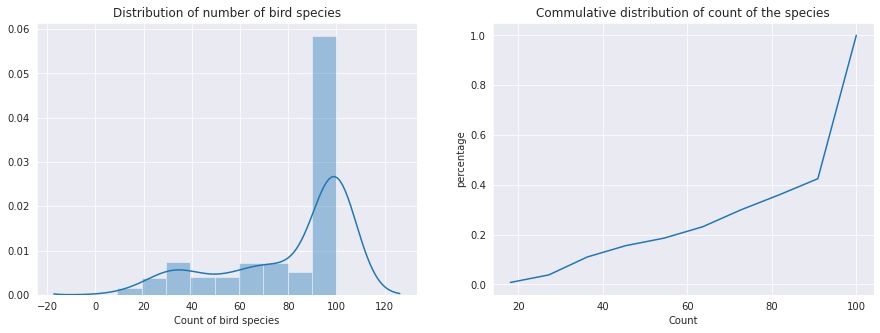

In [4]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.distplot(train_df.species.value_counts(),ax=ax1)
ax1.set_title("Distribution of number of bird species")
ax1.set_xlabel("Count of bird species")

counts, bin_edges = np.histogram(train_df.species.value_counts(), bins=10, density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax2 = fig.add_subplot(122)
ax2.plot(bin_edges[1:], cdf)
ax2.set_title("Commulative distribution of count of the species")
ax2.set_xlabel("Count")
ax2.set_ylabel("percentage")
plt.show()

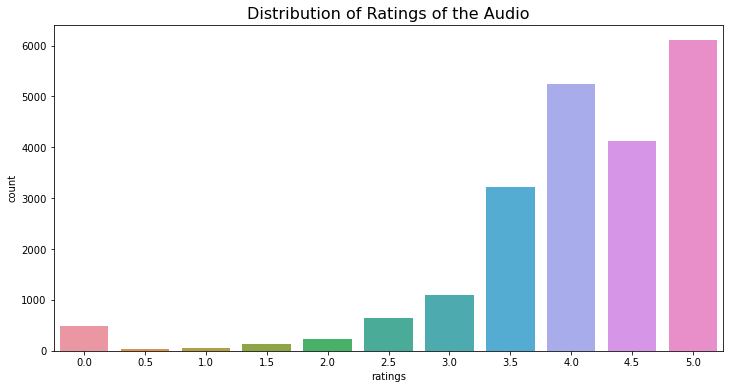

In [10]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='rating',data=train_df)
plt.title("Distribution of Ratings of the Audio", fontsize=16)
plt.xlabel("ratings")
plt.show()

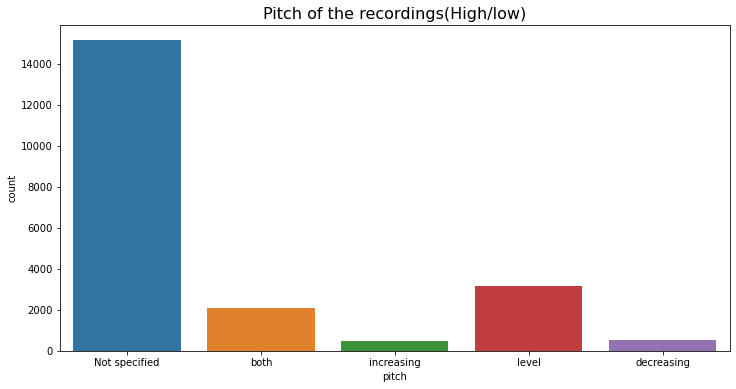

In [11]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='pitch',data=train_df)
plt.title("Pitch of the recordings(High/low)", fontsize=16)
plt.xlabel("pitch")
plt.show()

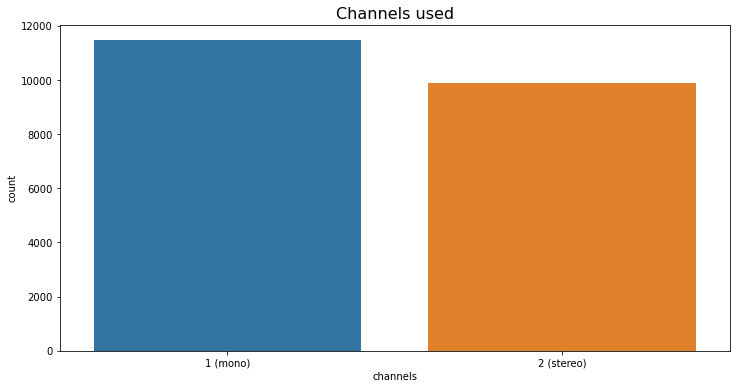

In [131]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='channels',data=train_df)
plt.title("Channels used", fontsize=16)
plt.xlabel("channels")
plt.show()

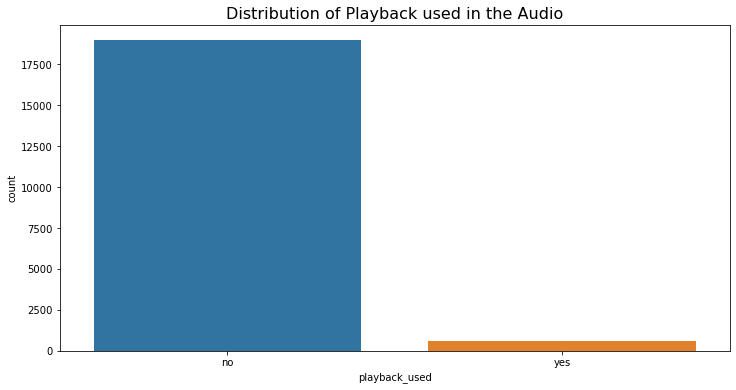

In [201]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='playback_used',data=train_df)
plt.title("Distribution of Playback used in the Audio", fontsize=16)
plt.xlabel("playback_used")
plt.show()

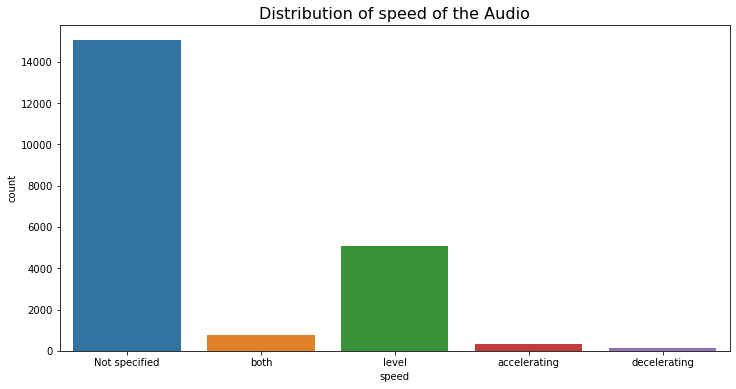

In [133]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='speed',data=train_df)
plt.title("Distribution of speed of the Audio", fontsize=16)
plt.xlabel("speed")
plt.show()

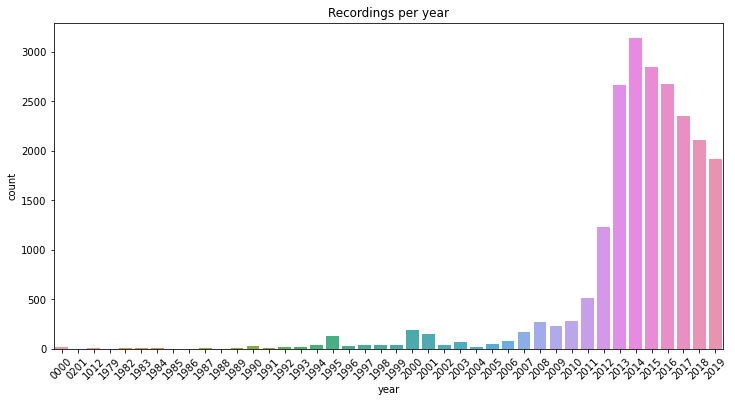

In [150]:
year = train_df['date'].apply(lambda x:x.split('-')[0])
plt.figure(figsize=(12,6))
ax = sns.countplot(year)
plt.title("Recordings per year")
plt.xlabel("year")
plt.xticks(rotation=45)
plt.show()

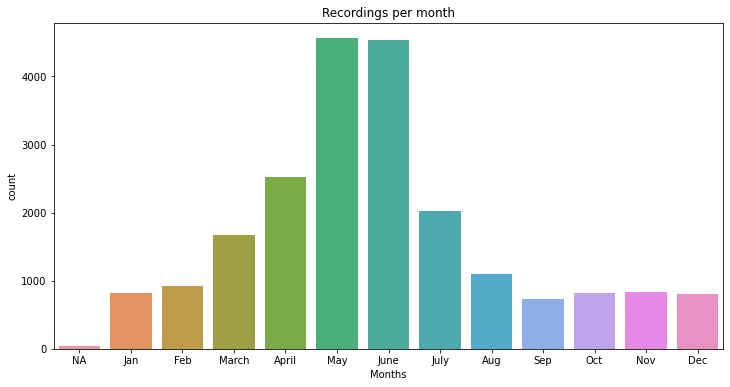

In [156]:
plt.figure(figsize=(12,6))
months = train_df['date'].apply(lambda x:x.split('-')[1])
ax = sns.countplot(months)
plt.title("Recordings per month")
plt.xlabel("Months")
ax.set_xticklabels(['NA','Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()

Text(0.5, 1.0, 'Top 10 countries where recording is done.')

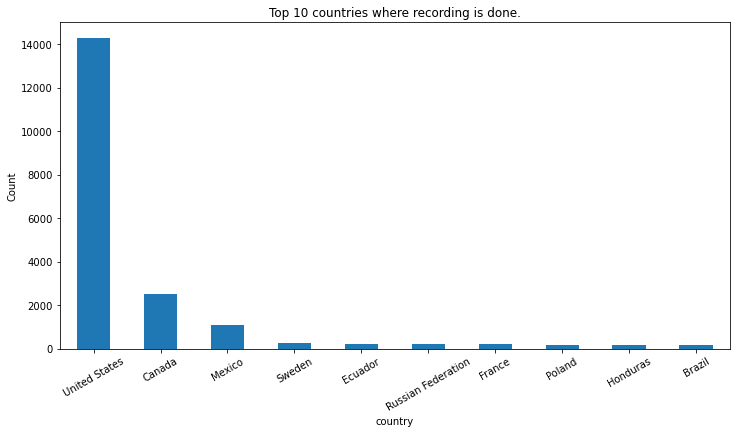

In [126]:
plt.figure(figsize=(12,6))
train_df.country.value_counts().head(10).plot(kind='bar')
plt.xlabel("country")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.title("Top 10 countries where recording is done.")
plt.show()

In [7]:
train_df.type.value_counts()

song                                              6718
call                                              6410
flight call                                       1203
call, song                                        1177
male, song                                         620
                                                  ... 
call, display, male                                  1
call, flock about 60 birds                           1
Flushed call, call                                   1
call, chase call, interaction rasp, wing whine       1
Multiple birds singing, male, song                   1
Name: type, Length: 1267, dtype: int64

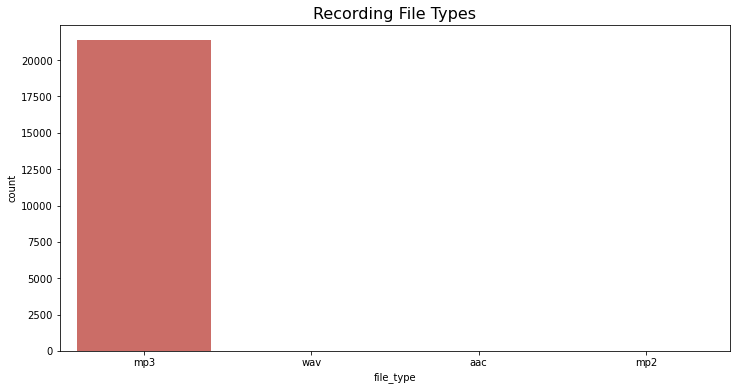

In [121]:
plt.figure(figsize=(12,6))
ax = sns.countplot(train_df['file_type'], palette = "hls", order = train_df['file_type'].value_counts().index)
plt.title("Recording File Types", fontsize=16)
plt.show()

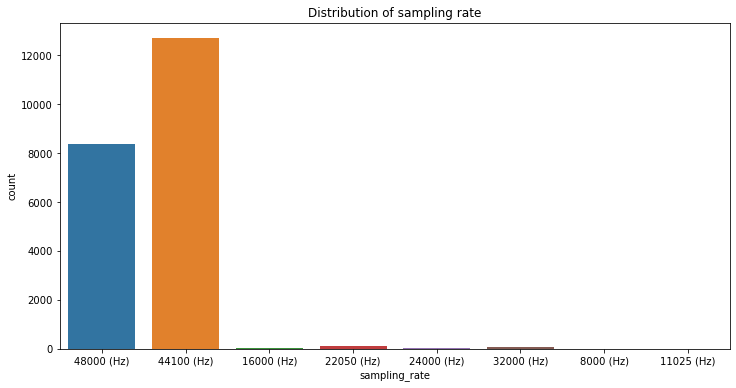

In [122]:
#sampling rate of the audio file at which they are recorded
plt.figure(figsize=(12,6))
sns.countplot(x='sampling_rate',data=train_df)
plt.title('Distribution of sampling rate')
plt.show()

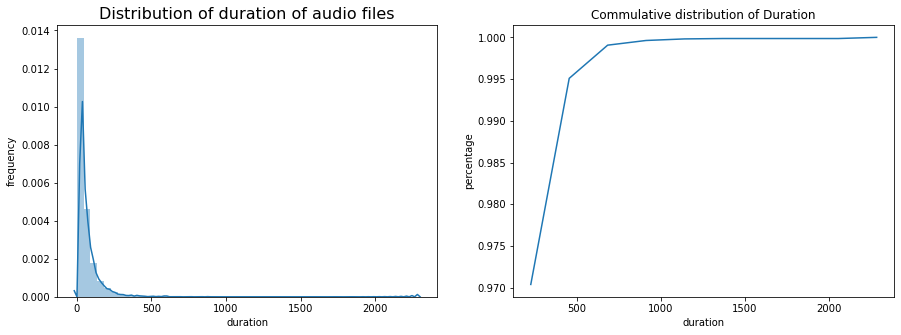

In [38]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
sns.distplot(train_df['duration'],ax=ax1)
ax1.set_title("Distribution of duration of audio files", fontsize=16)
ax1.set_ylabel("frequency")
counts, bin_edges = np.histogram(train_df['duration'], bins=10, density = True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax2 = fig.add_subplot(122)
ax2.plot(bin_edges[1:], cdf)
ax2.set_title("Commulative distribution of Duration")
ax2.set_xlabel("duration")
ax2.set_ylabel("percentage")
plt.show()

In [43]:
for i in range(5,9):
    print("{}th percentile of duration ".format(i*10),np.percentile(train_df['duration'], (i*10)))

for i in range(90,100):
    print("{}th percentile of duration ".format(i),np.percentile(train_df['duration'],i+1))

50th percentile of duration  33.0
60th percentile of duration  43.0
70th percentile of duration  58.0
80th percentile of duration  81.0
90th percentile of duration  134.0
91th percentile of duration  143.0
92th percentile of duration  154.0
93th percentile of duration  166.0
94th percentile of duration  182.0
95th percentile of duration  202.0
96th percentile of duration  227.0
97th percentile of duration  266.0
98th percentile of duration  364.0
99th percentile of duration  2283.0


### hearing some birdcalls

In [9]:
# adding full file path of the audios to the dataframe
train_df['filepath'] = audio_path
train_df.head(2)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,url,country,author,primary_label,longitude,length,time,recordist,license,filepath
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,train_audio/aldfly/XC134874.mp3
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,train_audio/aldfly/XC135454.mp3


In [37]:
# call of ALder FLycatcher
aldfly = train_df[train_df['ebird_code'] == "aldfly"].sample(5, random_state = 45)['filepath'].values
Audio(aldfly[1])

### feature extraction techniques using librosa
### 2D representation of sound waves

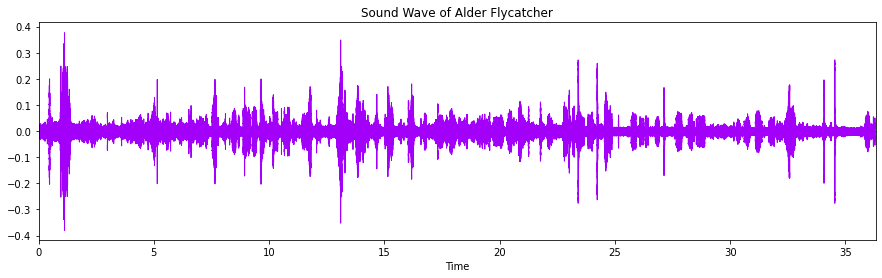

In [39]:
plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher', fontsize=12)
librosa.display.waveplot(y = samples, sr = sample_rate, color = "#A300F9")
plt.show()

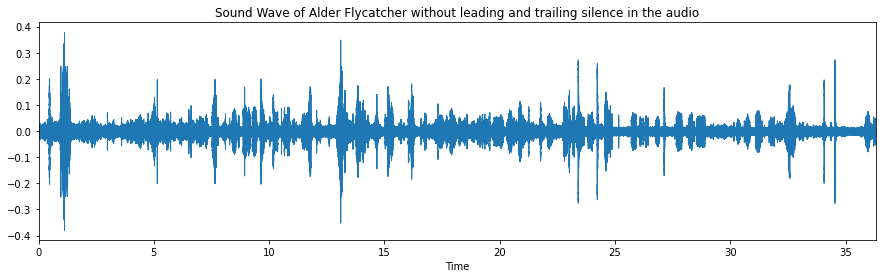

In [40]:
# Trim silence before and after the actual audio
audio_file, _ = librosa.effects.trim(samples)

plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher without leading and trailing silence in the audio', fontsize=12)
librosa.display.waveplot(y = audio_file, sr = sample_rate)
plt.show()

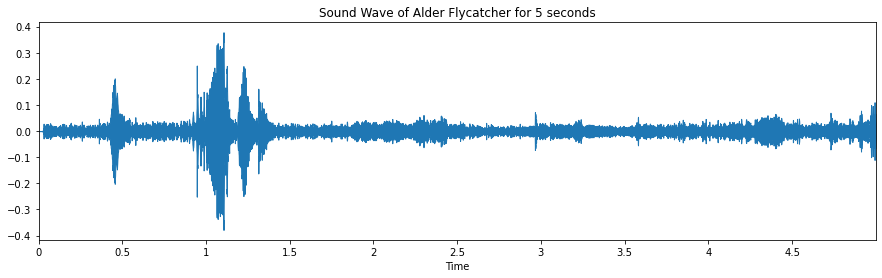

In [41]:
# plotting for 5 second sample 
plt.figure(figsize=(15,4))
plt.title('Sound Wave of Alder Flycatcher for 5 seconds', fontsize=12)
librosa.display.waveplot(y = audio_file[:5*sample_rate], sr = sample_rate)
plt.show()

### Zero Crossing Rate
* It is the rate at which the signal changes from positive to negative or vice versa i.e cross the horizontal axis.

In [42]:
# Total zero_crossings in aldfly call
zero_crossing = librosa.zero_crossings(samples, pad=False)
print("Zero crossings in aldfly sound call: ",sum(zero_crossing))

Zero crossings in aldfly sound call:  237662


### Harmonics and Perceptrual 

* Harmonics are characteristichs that represent the sound *color*
* Perceptrual shock wave represents the sound *rhythm and emotion*

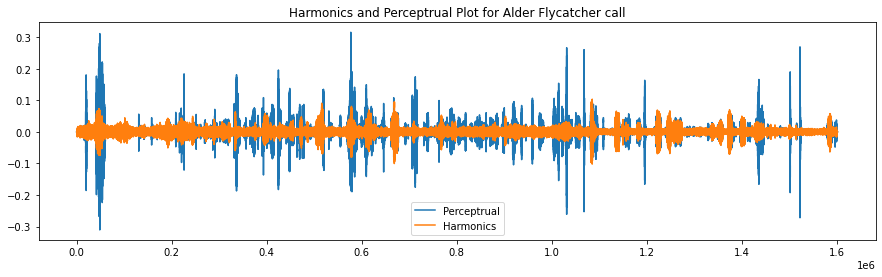

In [43]:
y_harm_aldfly, y_perc_aldfly = librosa.effects.hpss(samples)

plt.figure(figsize=(15, 4))
plt.plot(y_perc_aldfly)
plt.plot(y_harm_aldfly)
plt.legend(("Perceptrual", "Harmonics"))
plt.title("Harmonics and Perceptrual Plot for Alder Flycatcher call")
plt.show()

### Spectrogram

In [178]:
# https://musicinformationretrieval.com/stft.html
hop_length = 512 # frame increment
n_fft = 2048 # frame size
X = np.abs(librosa.stft(samples, n_fft=n_fft, hop_length=hop_length))
X.shape

(1025, 5756)

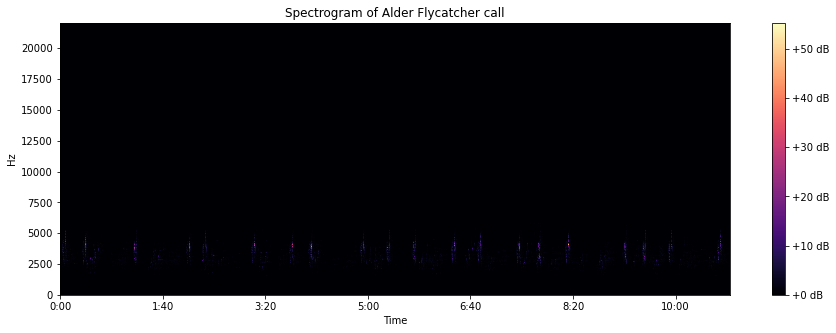

In [192]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(X, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Alder Flycatcher call")
plt.show()

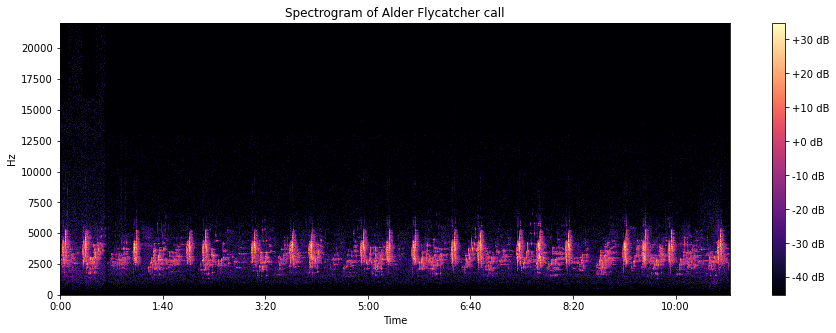

In [193]:
# transform axes to log scale using librosa amplitude_to_db function
spectrogram = librosa.amplitude_to_db(X)

plt.figure(figsize=(15, 5))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Alder Flycatcher call")
plt.show()

### Mel Spectrogram

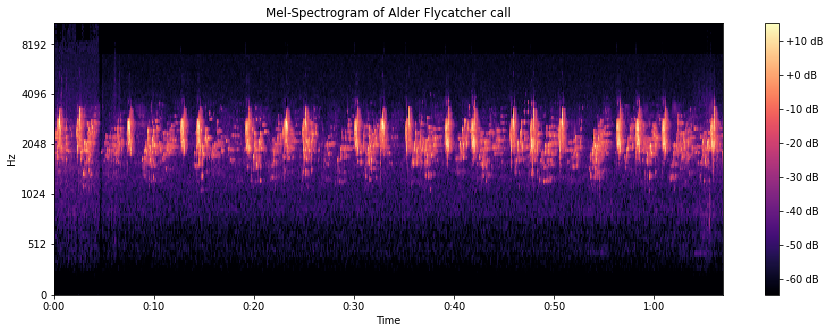

In [194]:
# getting mel spectrogram using librosa melspectrogram feature
mel_spectrogram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)

# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel_spectrogram))

# plot the spectrogram using librosa.display.specshow.
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

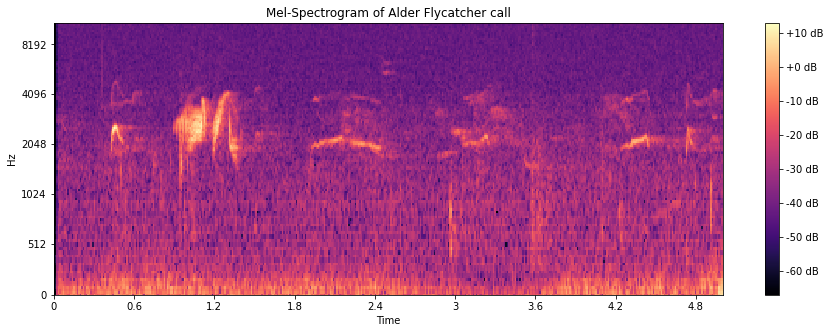

In [44]:
n_fft=1024
hop_length=512
sample_rate = 44100

mel = librosa.feature.melspectrogram(audio_file[:sample_rate*5], 44100, n_mels=128, n_fft=1024, hop_length=512, fmin=20, fmax=16000)
# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel))

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

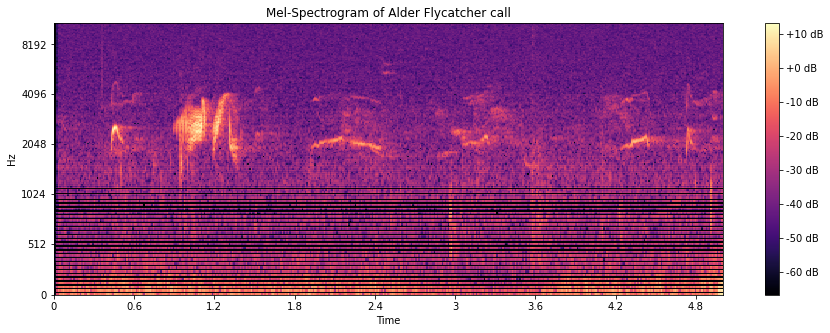

In [45]:
n_fft=1024
hop_length=512
sample_rate = 44100
mel = librosa.feature.melspectrogram(audio_file[:44100*5], 44100, n_mels=256, n_fft=1024, hop_length=512, fmin=20, fmax=16000)
# transforming to mel scale
mel_scale = librosa.power_to_db(abs(mel))

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_scale, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spectrogram of Alder Flycatcher call")
plt.show()

##  Feature Encoding/Data Preparation
###  Splitting data into train and validation

In [25]:
# dataframe containg the path to the audio files and the class labels
df_audio = pd.read_csv('df_audio.csv')
df_audio.head(2)

,filename,filepath,duration,sampling_rate,ebird_code
0,XC134874.mp3,train_audio/aldfly/XC134874.mp3,25,48000 (Hz),aldfly
1,XC135454.mp3,train_audio/aldfly/XC135454.mp3,36,44100 (Hz),aldfly


In [84]:
#splitting the data into train and validation and save in X_train, X_cv, y_train, y_cv
#using stratify sampling,random state of 45 and validaton size of 20%
X_train, X_test, y_train, y_test = train_test_split(df_audio,df_audio.ebird_code,test_size=0.2, 
                                                    random_state=45,stratify=df_audio.ebird_code)

print("Training data: ",X_train.shape,y_train.shape)
print("Validataion data: ",X_test.shape,y_test.shape)

Training data:  (17100, 5) (17100,)
Validataion data:  (4275, 5) (4275,)


In [6]:
X_train.head()

,filename,filepath,duration,sampling_rate,ebird_code
14151,XC465329.mp3,train_audio/osprey/XC465329.mp3,36,44100 (Hz),osprey
14723,XC454672.mp3,train_audio/pibgre/XC454672.mp3,15,48000 (Hz),pibgre
14035,XC358544.mp3,train_audio/orcwar/XC358544.mp3,61,48000 (Hz),orcwar
16425,XC145611.mp3,train_audio/robgro/XC145611.mp3,52,44100 (Hz),robgro
18291,XC182419.mp3,train_audio/stejay/XC182419.mp3,3,44100 (Hz),stejay


In [7]:
bird_species_mapping = dict(zip(train_df['ebird_code'],train_df['species']))
# Integer coding the class labels
ebird_code_labeled = dict()
ebird_code_classes = dict()

ebird_code_labeled['nocall'] = 0
ebird_code_classes[0] = 'nocall'
for i, bird in enumerate(df_audio['ebird_code'].unique()):
    ebird_code_labeled[bird] = i+1
    ebird_code_classes[i+1] = bird


### Raw Data (Generating samples of 5 seconds)

In [45]:
# sampling audio to 5 seconds length
def raw_data(filename,bird_code,raw_df):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    data_point_per_second = 10
    
    #Take 10 data points every second
    samples = samples[0::int(sample_rate/data_point_per_second)]
    #We normalize each sample before extracting 5s samples from it
    normalized_sample = sklearn.preprocessing.minmax_scale(samples, axis=0)
    
    #only take 5s samples and add them to the dataframe
    song_sample = []
    sample_length = 5*data_point_per_second
    for idx in range(0,len(normalized_sample),sample_length): 
        song_sample = normalized_sample[idx:idx+sample_length]
        if len(song_sample)>=sample_length:
            raw_df = raw_df.append({"song_samples":np.asarray(song_sample).astype(np.float32),
                                            "bird_code":ebird_code_labeled[bird_code]}, ignore_index=True)
    return raw_df

In [46]:
raw_df = pd.DataFrame(columns=["song_samples","bird_code"])
for i, row in tqdm(df_audio[['filepath','ebird_code']][12327:].iterrows()):
    raw_df = raw_data(row.filepath, row.ebird_code, raw_df)
    
raw_df.to_csv('raw_df.csv',index=False)

9048it [4:15:54,  1.70s/it]


### Creating Spectrogram for 5 seconds sample and saving as npz file with data and labels

In [8]:
# stacking the image to 3 channels for CNN models
def mono_to_color(X: np.ndarray, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    """Code from https://www.kaggle.com/daisukelab/creating-fat2019-preprocessed-data"""
    # Stack X as [X,X,X]
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    X = X - mean
    std = std or X.std()
    Xstd = X / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        # Normalize to [0, 255]
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        # Just zero
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V

In [ ]:
# sampling audio to 5 seconds length
def spectrogram_images(filename,bird_code):
    sample_rate = 44100
    try:
        samples, sample_rate = librosa.load(filename,sr=44100)
    except:
        sound = AudioSegment.from_file(filename)
        samples = sound.get_array_of_samples()
        new_sound = sound._spawn(samples)
        samples = np.array(samples).astype(np.float32)

    samples, _ = librosa.effects.trim(samples)
    
    #only take 5s samples and save them to the np array
    sample_length = 5*sample_rate
    X = np.abs(librosa.stft(samples[:44100*5], n_fft=1024, hop_length=512))
    spectrogram = librosa.amplitude_to_db(X)
    image = mono_to_color(spectrogram)

    res = cv2.resize(image, (224, 224))
    res = (res / 255.0).astype(np.float32)
    res = np.asarray(res)
    
    incep = cv2.resize(image, (299, 299))
    incep = (incep / 255.0).astype(np.float32)
    incep = np.asarray(incep)
    
    label = ebird_code_labeled[bird_code]
    
    return spectrogram,res,incep,label


def func(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_train[['filepath','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.filepath, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
    
    # stroing the data as npz file for easy access
#     np.savez_compressed('processed_data/VGG/STFT/train/images_data'+str(idx),a=spec,b=labels)
    np.savez_compressed('processed_data/ResNet/tr/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('processed_data/Inception/tr/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('processed_data/spec_data/tr/images_data'+str(idx),a=spec,b=labels)
    
def func1(start,end,idx):
    labels = []
    img_res = []
    img_incep = []
    spec = []

    for i, row in X_cv[['filepath','ebird_code']][start*idx:end*(idx+1)].iterrows():
        mel_spec,res,incep,label = spectrogram_images(row.filepath, row.ebird_code)
        spec.extend(mel_spec)
        img_res.append(res)
        img_incep.append(incep)
        labels.append(label)
        
#     np.savez_compressed('processed_data/VGG/STFT/validation/images_data'+str(idx),a=spec,b=labels)    
    np.savez_compressed('processed_data/ResNet/val/images_data'+str(idx),a=img_res,b=labels)
    np.savez_compressed('processed_data/Inception/val/images_data'+str(idx),a=img_incep,b=labels)
    np.savez_compressed('processed_data/spec_data/val/images_data'+str(idx),a=spec,b=labels)

In [18]:
for i in tqdm(range(0,535,8)):
    if i != 528:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func, args=(32,32,i))
        p2 = multiprocessing.Process(target=func, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func, args=(32,32,i+6))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()

100%|██████████| 67/67 [1:53:11<00:00, 101.37s/it]


In [52]:
for i in tqdm(range(0,134,8)):
    if i != 128:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))
        p7 = multiprocessing.Process(target=func1, args=(32,32,i+6))
        p8 = multiprocessing.Process(target=func1, args=(32,32,i+7))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()
        p7.start()
        p8.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()
        p7.join()
        p8.join()
    else:
        p1 = multiprocessing.Process(target=func1, args=(32,32,i))
        p2 = multiprocessing.Process(target=func1, args=(32,32,i+1))
        p3 = multiprocessing.Process(target=func1, args=(32,32,i+2))
        p4 = multiprocessing.Process(target=func1, args=(32,32,i+3))
        p5 = multiprocessing.Process(target=func1, args=(32,32,i+4))
        p6 = multiprocessing.Process(target=func1, args=(32,32,i+5))

        p1.start()
        p2.start()
        p3.start()
        p4.start()
        p5.start()
        p6.start()

        p1.join()
        p2.join()
        p3.join()
        p4.join()
        p5.join()
        p6.join()

100%|██████████| 1/1 [00:00<00:00, 1245.34it/s]

Done !


Spec images data:  (32, 224, 224, 3) (32, 1)
Spec data:  (128, 431) (1,)


<AxesSubplot:xlabel='Time', ylabel='Hz'>

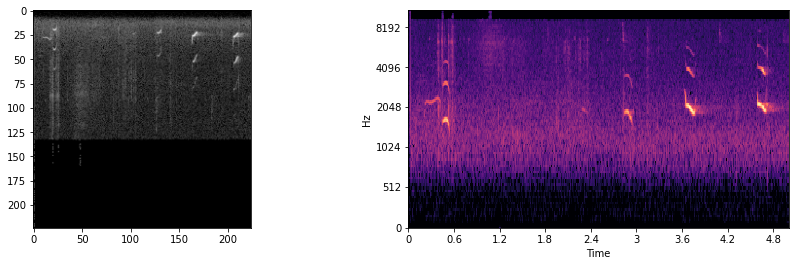

In [137]:
# checking the data after pre-processing
img = np.load('processed_data/VGG/STFT/train/images_data0.npz')
print("Spec images data: ",img['a'].shape,img['b'].shape)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(img['a'][0])
# Checking the 5 seconds spectrogram generated
spec = np.load('processed_data/spec_data/train/images_data0.npz')
print("Spec data: ",spec['a'][0].shape,spec['b'][:1].shape)
plt.subplot(1,2,2)
librosa.display.specshow(spec['a'][0], sr=44100, hop_length=512, x_axis='time', y_axis='mel')

## Model Training

### CNN Models 
#### 1 ResNets50

In [159]:
# train set
train_dir_path = "processed_data/ResNet/tr/"
train_files_path = os.listdir(train_dir_path)
train_gen_res = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "processed_data/ResNet/val/"
test_files_path = os.listdir(test_dir_path)
test_gen_res = DataGenerator(train_dir_path, test_files_path)

In [143]:
# ResNet50 for spectrogram images
layer_1 = ResNet50(include_top=False,weights="imagenet",input_shape=(224,224,3))
layer_1.trainable = False
average = tf.keras.layers.GlobalAveragePooling2D()(layer_1.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES, activation='sigmoid')(dense)

model_res50 = Model(inputs=layer_1.input,outputs=output)
model_res50.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [34]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit4','resnet50')

model_res50.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist4 = model_res50.fit(train_gen_res, epochs=10, steps_per_epoch=len(train_gen_res), validation_data=test_gen_res,
                        callbacks=callbacks)

Epoch 1/5
535/535 [==============================] - 9069s 17s/step - loss: 2.6664 - accuracy: 0.4071 - f1_score: 0.4071 - val_loss: 2.6304 - val_accuracy: 0.4094 - val_f1_score: 0.4094 
Epoch 2/5
535/535 [==============================] - 9078s 17s/step - loss: 2.5995 - accuracy: 0.4110 - f1_score: 0.4110 - val_loss: 2.5684 - val_accuracy: 0.4115 - val_f1_score: 0.4115 
Epoch 3/5
535/535 [==============================] - 9090s 17s/step - loss: 2.5730 - accuracy: 0.4201 - f1_score: 0.4201 - val_loss: 2.5712 - val_accuracy: 0.4258 - val_f1_score: 0.4258 
Epoch 4/5
535/535 [==============================] - 9089s 17s/step - loss: 2.5617 - accuracy: 0.4418 - f1_score: 0.4418 - val_loss: 2.5770 - val_accuracy: 0.4326 - val_f1_score: 0.4326 
Epoch 5/5
535/535 [==============================] - 9090s 17s/step - loss: 2.5607 - accuracy: 0.4477 - f1_score: 0.4477 - val_loss: 2.5682 - val_accuracy: 0.4386 - val_f1_score: 0.4386 


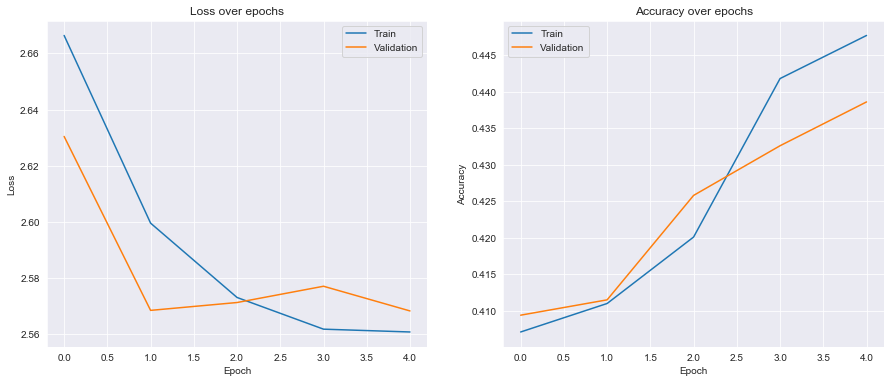

In [33]:
plot_summary(hist4)

#### 2 InceptionV3

In [145]:
# Inceptionv3 trained on imagenet for spectrogram images
top_layers = InceptionV3(include_top=False, weights="imagenet",input_shape=(299,299,3))
top_layers.trainable = False
average = GlobalAveragePooling2D()(top_layers.output)
dense = Dense(512, activation='relu', kernel_initializer='glorot_uniform', name='dense1')(average)
output = Dense(NUM_CLASSES,activation='sigmoid')(dense)

model_inceptionv3 = Model(inputs=top_layers.input,outputs=output)
model_inceptionv3.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_454 (Conv2D)             (None, 149, 149, 32) 864         input_17[0][0]                   
__________________________________________________________________________________________________
batch_normalization_450 (BatchN (None, 149, 149, 32) 96          conv2d_454[0][0]                 
__________________________________________________________________________________________________
activation_450 (Activation)     (None, 149, 149, 32) 0           batch_normalization_450[0][0]    
______________________________________________________________________________________

In [163]:
# train set
train_dir_path = "processed_data/Inception/tr/"
train_files_path = os.listdir(train_dir_path)
train_gen_incep = DataGenerator(train_dir_path, train_files_path)

# test set
test_dir_path = "processed_data/Inception/val/"
test_files_path = os.listdir(test_dir_path)
test_gen_incep = DataGenerator(train_dir_path, test_files_path)

In [30]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit5','inceptionv3')

model_inceptionv3.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

hist5 = model_inceptionv3.fit(train_gen_incep, epochs=5, steps_per_epoch=len(train_gen_incep), validation_data = test_gen_incep,
                              callbacks=callbacks)

Epoch 1/5
535/535 [==============================] - 6095s 11s/step - loss: 1.9385 - accuracy: 0.5299 - f1_score: 0.5299 - val_loss: 1.9113 - val_accuracy: 0.5278 - val_f1_score: 0.5278 
Epoch 2/5
535/535 [==============================] - 6181s 12s/step - loss: 1.9119 - accuracy: 0.5317 - f1_score: 0.5317 - val_loss: 1.9047 - val_accuracy: 0.5391 - val_f1_score: 0.5391 
Epoch 3/5
535/535 [==============================] - 6181s 12s/step - loss: 1.8919 - accuracy: 0.5417 - f1_score: 0.5417 - val_loss: 1.9047 - val_accuracy: 0.5423 - val_f1_score: 0.5423 
Epoch 4/5
535/535 [==============================] - 6095s 11s/step - loss: 1.8985 - accuracy: 0.5599 - f1_score: 0.5599 - val_loss: 1.8988 - val_accuracy: 0.5578 - val_f1_score: 0.5578 
Epoch 5/5
535/535 [==============================] - 6181s 12s/step - loss: 1.8919 - accuracy: 0.5577 - f1_score: 0.5577 - val_loss: 1.8904 - val_accuracy: 0.5511 - val_f1_score: 0.5511 


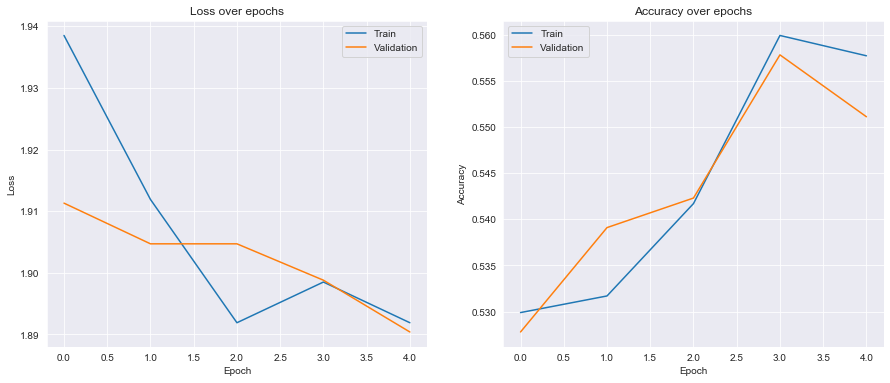

In [29]:
plot_summary(hist5)

#### 3 DenseNet

In [113]:
# Dense Block
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = tf.keras.layers.BatchNormalization()(temp)
        relu = tf.keras.layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = tf.keras.layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        # Conv2D_3_3 = layers.SeparableConv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = tf.keras.layers.Dropout(dropout_rate)(Conv2D_3_3)
        concat = tf.keras.layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Block
def transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = tf.keras.layers.BatchNormalization()(input)
    relu = tf.keras.layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = tf.keras.layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = tf.keras.layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input,num_classes):
    global compression
    BatchNorm = tf.keras.layers.BatchNormalization()(input)
    relu = tf.keras.layers.Activation('relu')(BatchNorm)
    AvgPooling = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(relu)
    fc1Conv1 = Conv2D(filters=624,kernel_size=(2,2),strides=(1,1),padding='valid',activation='relu')(AvgPooling)
    # using convolution layer as output layer instead of dense layer.
    fc2Conv1 = Conv2D(filters=num_classes,kernel_size=(1,1),strides=(1,1),padding='valid',activation='sigmoid')(fc1Conv1)
    output = tf.keras.layers.GlobalAveragePooling2D()(fc2Conv1)
    # output = layers.Dense(num_classes, activation='softmax')(flat)
    return output

In [114]:
# Hyperparameters
num_filter = 12
num_classes = 265
l = 20 # number of layers in dense block
compression = 0.5
# compression = 1.0
dropout_rate = 0.2

input_dense = Input(shape=(224, 224, 3,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input_dense)

First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output_dense = output_layer(Last_Block,NUM_CLASSES)

model_dense = Model(inputs=[input_dense], outputs=[output_dense])
model_dense.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_368 (Conv2D)             (None, 224, 224, 12) 324         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_366 (BatchN (None, 224, 224, 12) 48          conv2d_368[0][0]                 
__________________________________________________________________________________________________
activation_366 (Activation)     (None, 224, 224, 12) 0           batch_normalization_366[0][0]    
_______________________________________________________________________________________

In [19]:
optim = tf.keras.optimizer.Adam(learning_rate=0.001)
callbacks = callbacks('fit6','model_dense')

model_dense.compile(loss=loss_function, optimizer=optim, metrics=[acc,fs])

# training the model on whole data
hist6 = model_dense.fit(train_gen_res, epochs=5, steps_per_epoch=len(train_gen_res), validation_data=test_gen_res, 
                        callbacks=callbacks)

Epoch 1/5
  1/535 [..............................] - ETA: 0s - loss: 3.3184 - accuracy: 0.0000e+00 - f1_score: 0.0000e+00WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
535/535 [==============================] - 9369s 19s/step - loss: 2.5964 - accuracy: 0.4371 - f1_score: 0.4371 - val_loss: 2.6034 - val_accuracy: 0.4094 - val_f1_score: 0.4094 
Epoch 2/5
535/535 [==============================] - 9378s 19s/step - loss: 2.5395 - accuracy: 0.4410 - f1_score: 0.4410 - val_loss: 2.5984 - val_accuracy: 0.4315 - val_f1_score: 0.4315 
Epoch 3/5
535/535 [==============================] - 9390s 19s/step - loss: 2.5130 - accuracy: 0.4501 - f1_score: 0.4501 - val_loss: 2.5002 - val_accuracy: 0.4458 - val_f1_score: 0.4458 
Epoch 4/5
535/535 [==============================]

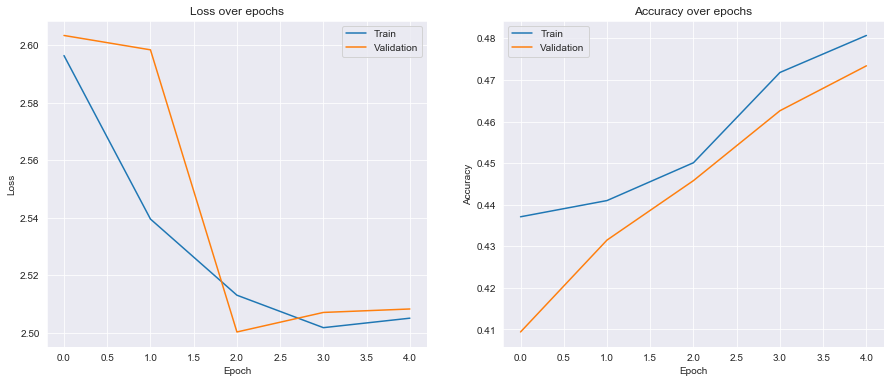

In [18]:
plot_summary(hist6)

### Ensemble using ML Models

In [4]:
# Model loading and data preparation
m1 = tf.keras.models.load_model('model_logs/model_res50.h5',custom_objects={'f1':fs})
m2 = tf.keras.models.load_model('model_logs/model_inceptionv3.h5',custom_objects={'f1':fs})
m3 = tf.keras.models.load_model('model_logs/model_dense.h5',custom_objects={'f1':fs})

x_tr1 = m1(train_gen_res)
x_tr2 = m2(train_gen_incep)
x_tr3 = m3(train_gen_res)

x_te1 = m1(test_gen_res)
x_te2 = m2(test_gen_incep)
x_te3 = m3(test_gen_res)

X = np.vstack((x_tr1,x_tr2,x_tr3))
X_te = np.vstack((x_te1,x_te2,x_te3))

# getting the proper labels
y = []
for i in len(train_gen_res):
    y_tr.extend(np.argwhere(train_gen_res[i][1]>0.5))
    
y_te = []
for i in len(test_gen_res):
    y_te.extend(np.argwhere(training_res[i][1]>0.5))

In [68]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from scipy.stats import randint as sp_randint

In [70]:
# tuning Logistic
x_cfl = SGDClassifier(loss='log', random_state=45,n_jobs=-1)

prams = { 'alpha':[0.001,0.01,0.1,1,10,100,1000]}

random_cfl1 = RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)

random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

# tuning svm
x_cfl = SGDClassifier(loss='hinge', random_state=45,n_jobs=-1)

prams = { 'alpha':[0.001,0.01,0.1,1,10,100,1000]}

random_cfl1 = RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)

random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])

# Parameter tuning of Random forest classifier using Randomised search CV
param_dist = {"n_estimators":sp_randint(1,500),
              "max_depth": sp_randint(3,20),
              "min_samples_split": sp_randint(50,200),
              "min_samples_leaf": sp_randint(2,50)}

clf = RandomForestClassifier(random_state=45,n_jobs=-1)

random_cfl1 = RandomizedSearchCV(clf,param_distributions=param_dist,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)
random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])
# print("""mean test scores [0.52784267 0.51454799 0.52288333 0.5648653 0.55747887]
# mean train scores [0.53456205 0.5163616  0.56412152 0.56941303 0.57147887]""")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    4.3s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.6s finished


mean test scores [0.07321429 0.07857143 0.07857143 0.07142857 0.05       0.03928571
 0.03928571]
mean train scores [0.07455357 0.07857143 0.07857143 0.071875   0.05178571 0.04151786
 0.04151786]
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    2.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.6s finished


mean test scores [0.04821429 0.04285714 0.0625     0.0375     0.02857143 0.03928571
 0.03928571]
mean train scores [0.04821429 0.04330357 0.06160714 0.04866071 0.03482143 0.04151786
 0.04151786]
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:    8.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.4s finished


mean test scores [0.11607143 0.12678571 0.13571429 0.1375     0.11607143 0.125
 0.11607143 0.12857143 0.11428571 0.13035714]
mean train scores [0.13303571 0.17008929 0.16205357 0.25357143 0.128125   0.15133929
 0.18973214 0.14598214 0.18928571 0.15223214]


In [65]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl = XGBClassifier(random_state=45,n_jobs=-1)

prams = { 'learning_rate':[0.001,0.01,0.03,0.05,0.1,0.15,0.2],
         'n_estimators':[1,3,5,10,50,100,250,500,1000],
         'max_depth':[3,5,10,15,20,50],'colsample_bytree':[0.1,0.3,0.5,1],
         'subsample':[0.1,0.3,0.5,1]
        }

random_cfl1 = RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=5,n_jobs=-1,random_state=45,
                               return_train_score=True)

random_cfl1.fit(X,y)

print('mean test scores',random_cfl1.cv_results_['mean_test_score'])
print('mean train scores',random_cfl1.cv_results_['mean_train_score'])
# print("""mean test scores [0.52784267 0.51454799 0.52288333 0.5648653 0.55747887]
# mean train scores [0.53456205 0.5163616  0.56412152 0.56941303 0.57147887]""")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  3.2min remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


mean test scores [0.12857143 0.0625     0.08571429 0.19107143 0.16964286 0.0625
 0.15535714 0.2375     0.2125     0.07321429]
mean train scores [0.16428571 0.06383929 0.08348214 0.265625   0.309375   0.06339286
 0.18526786 0.35044643 0.34598214 0.07410714]


In [63]:
clf = XGBClassifier(n_estimators=50, max_depth=15,subsample=0.5,learning_rate=0.2,colsample_bytree=0.3,random_state=45,
                      n_jobs=-1)
clf.fit(X,y)
pickle.dump(clf, open('model_logs/NN_soft_stacking.pkl','wb'))

y_train_pred = clf.predict(X)
y_test_pred = clf.predict(X_cv)
# printing train and test scores
print('Train f1 score',f1_score(y,y_train_pred, average='macro'))
print('Test f1 score',f1_score(y_cv,y_test_pred,average='macro'))

Train f1 score 0.5729005524861879
Test f1 score 0.5176014801841756
